In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NaiveSeasonal
from darts.metrics import mape, mae, rmse


## Functions

In [2]:
## read data
def get_timeseries (filepath):
    electricity_consumption = pd.read_csv(filepath)
    # Convert dataframe to Timeseries
    ts = TimeSeries.from_dataframe(electricity_consumption, time_col="Date" )
    return ts



In [3]:
def eval_model(model, full_data,val_target, DESC):
    pred_series = model.predict(n=42)[DESC]
    plt.figure(figsize=(8, 5))
    full_data[DESC].plot(label="actual")
    pred_series[DESC].plot(label="forecast")
    plt.title("Seasonal Naive Bayes Model: RMSE: {:.2f}, MAE: {:.2f}, MAPE: {:.2f}".format(rmse(val_target, pred_series), mae(val_target, pred_series), mape(val_target, pred_series)))
    plt.legend()
    return pred_series

In [4]:
import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [5]:
file_list_name = ['Electricity-ResBusClimateUNI.csv', 'Electricity-ResBusClimateCNI.csv', 
                  'Electricity-ResBusClimateLNI.csv', 'Electricity-ResBusClimateUSI.csv', 'Electricity-ResBusClimateLSI.csv']
path_name = '../AnalysisAndPreprocessing/ProcessedData_Original/'
timeseries_list = [get_timeseries(path_name + file) for file in file_list_name]
zone_names = ['UNI', 'CNI', 'LNI', 'USI', 'LSI']


# Residential Data

In [6]:
residential_metrics = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'Zone'])

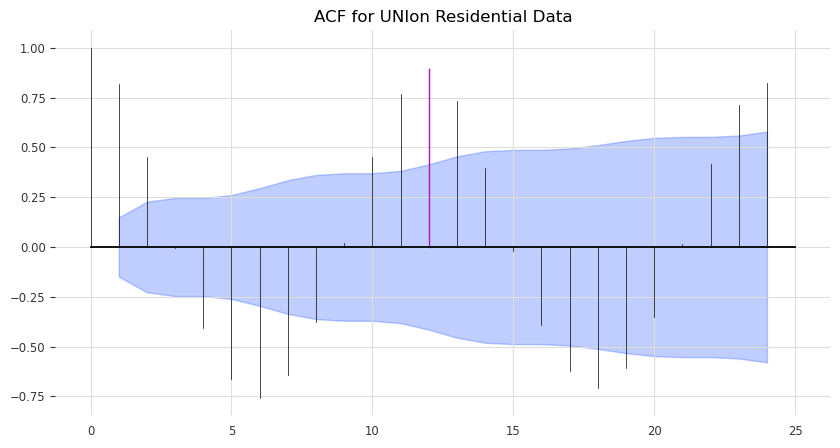

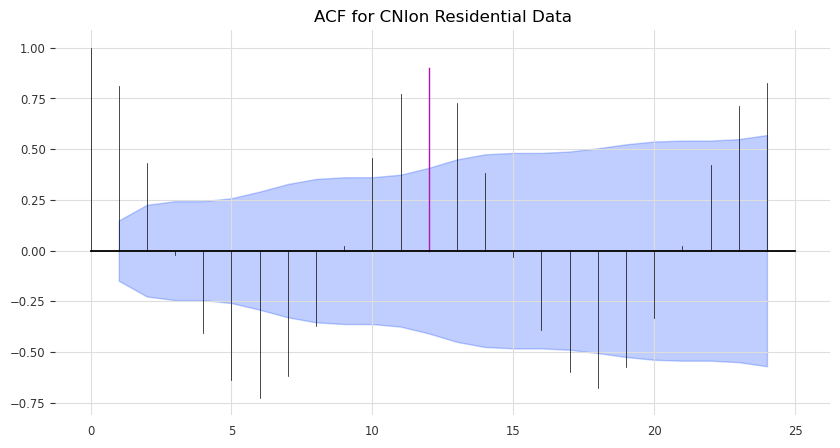

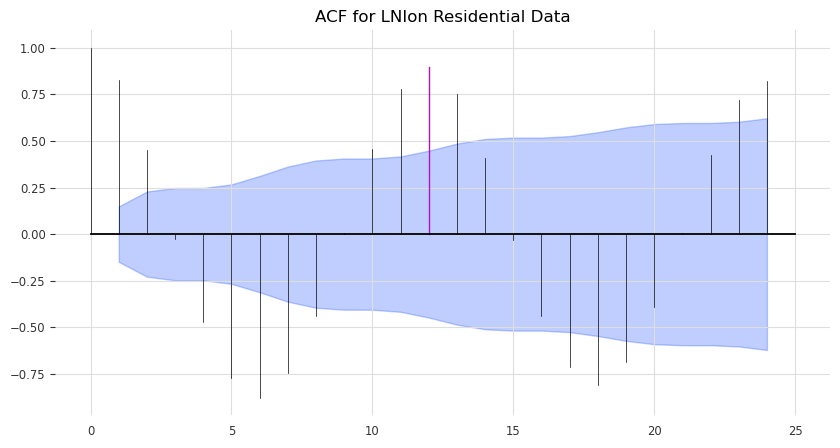

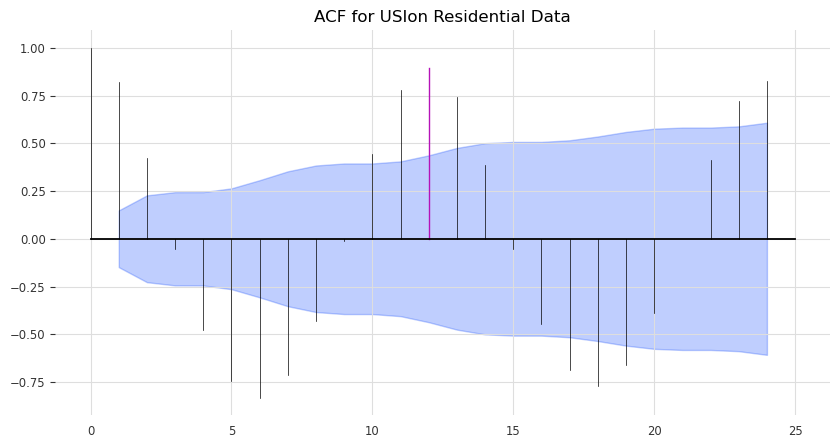

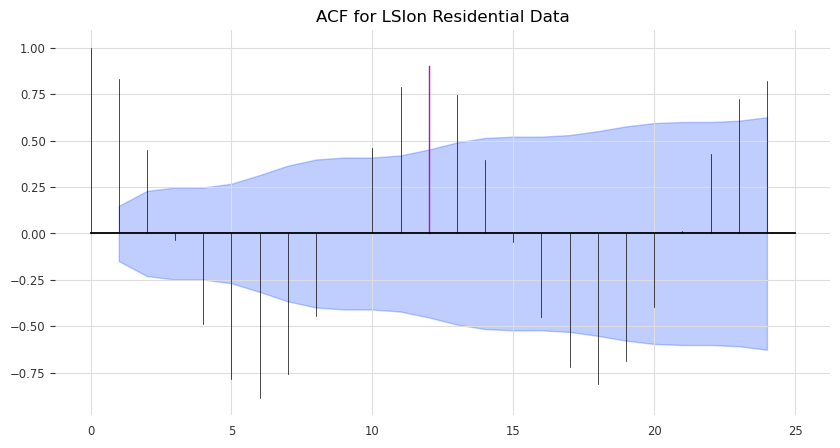

In [7]:
from darts.utils.statistics import plot_acf, check_seasonality
for i in range(len(timeseries_list)):
    plot_acf(timeseries_list[i]['Est. Total consumption (GWh)'], m=12, alpha=0.05, max_lag=24)
    plt.title('ACF for ' + zone_names[i] + 'on Residential Data')

In [8]:
f"SeasonalNB|{zone_names[i]}|res.csv"

'SeasonalNB|LSI|res.csv'

In [18]:
for i in range(len(timeseries_list)):
    print(file_list_name[i])
    naive_model = NaiveSeasonal(K=12)
    y_pred = naive_model.historical_forecasts(timeseries_list[i][['Est. Total consumption (GWh)']], start=pd.Timestamp('2018-01-01'), forecast_horizon=3)
    # residential_metrics.loc[len(residential_metrics.index)] = [rmse(val[Electricity_Type], ypred), 
    #                                                            mae(val[Electricity_Type], ypred), 
    #                                                            mape(val[Electricity_Type], ypred), 
    #                                                             zone_names[i]]
    # ypred.to_csv(f"./Predictions/SeasonalNB,{zone_names[i]},res.csv")
    residential_metrics.loc[len(residential_metrics.index)] = [rmse(timeseries_list[i][['Est. Total consumption (GWh)']], y_pred), 
                                                               mae(timeseries_list[i][['Est. Total consumption (GWh)']], y_pred), 
                                                               mape(timeseries_list[i][['Est. Total consumption (GWh)']], y_pred), 
                                                                zone_names[i]]
    backtest_pred = y_pred.pd_dataframe()
    backtest_pred.rename(columns={"Est. Total consumption (GWh)": "predictions"}, inplace=True)
    backtest_pred = backtest_pred.join(timeseries_list[i].pd_dataframe()['Est. Total consumption (GWh)'], how='inner')
    backtest_pred['difference'] = backtest_pred['predictions'] - backtest_pred['Est. Total consumption (GWh)']
    backtest_pred.to_csv(f'Naive_Seasonal,{zone_names[i]},res.csv')

Electricity-ResBusClimateUNI.csv
Electricity-ResBusClimateCNI.csv
Electricity-ResBusClimateLNI.csv
Electricity-ResBusClimateUSI.csv
Electricity-ResBusClimateLSI.csv


Electricity-ResBusClimateUNI.csv
Electricity-ResBusClimateCNI.csv
Electricity-ResBusClimateLNI.csv
Electricity-ResBusClimateUSI.csv
Electricity-ResBusClimateLSI.csv


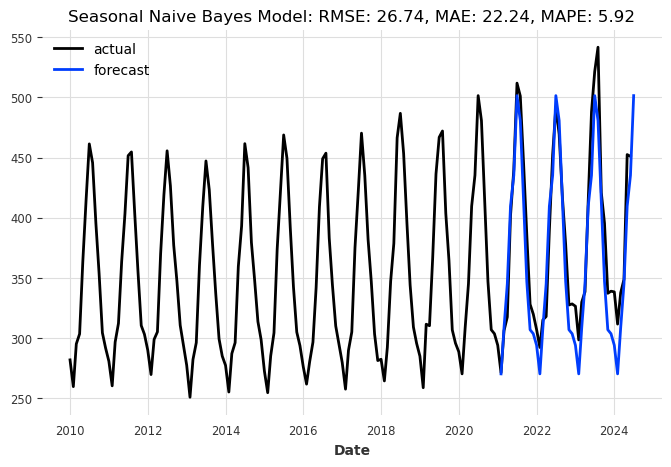

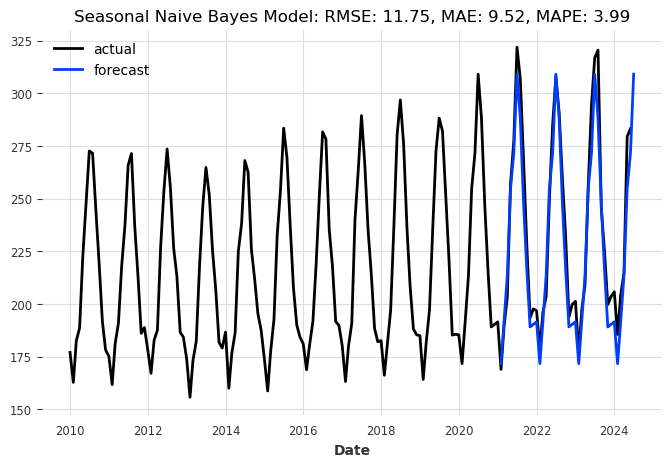

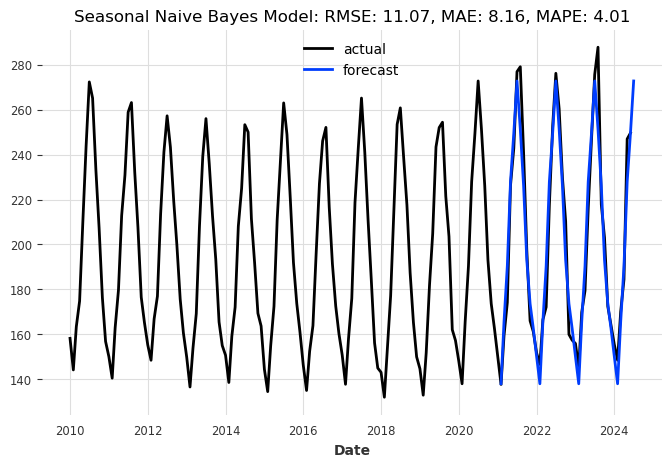

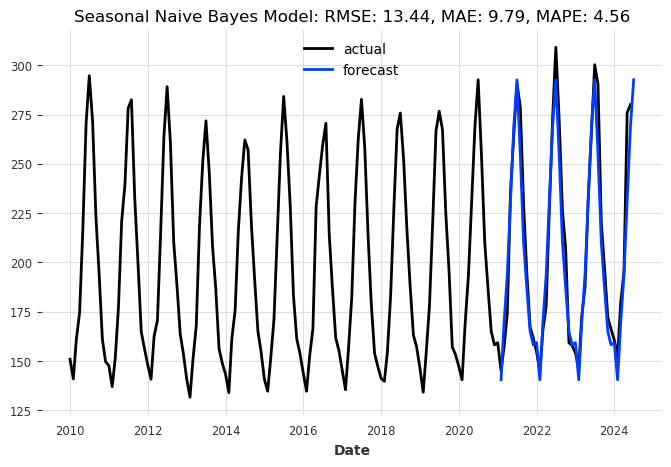

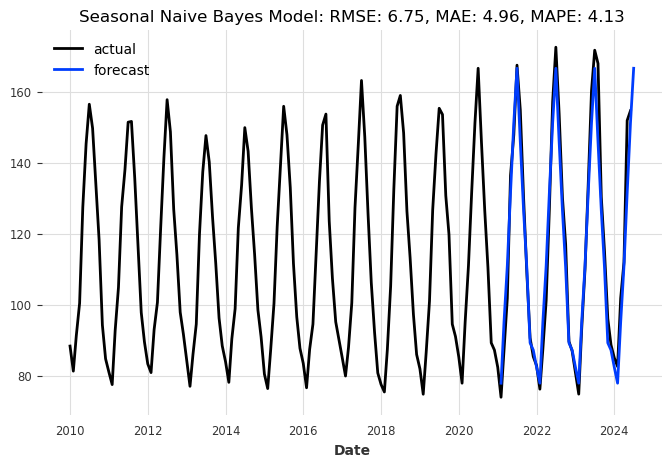

In [9]:
Electricity_Type = 'Est. Total consumption (GWh)'

for i in range(len(timeseries_list)):
    print(file_list_name[i])
    train, val = timeseries_list[i].split_after(pd.Timestamp('2021-01-01'))
    naive_model = NaiveSeasonal(K=12)
    naive_model.fit(train)
    ypred = eval_model(naive_model, timeseries_list[i], val[Electricity_Type], Electricity_Type)
    residential_metrics.loc[len(residential_metrics.index)] = [rmse(val[Electricity_Type], ypred), 
                                                               mae(val[Electricity_Type], ypred), 
                                                               mape(val[Electricity_Type], ypred), 
                                                                zone_names[i]]
    ypred.to_csv(f"./Predictions/SeasonalNB,{zone_names[i]},res.csv")
    

In [16]:
residential_metrics

,RMSE,MAE,MAPE,Zone
0,21.312865,16.443184,4.204311,UNI
1,9.544775,7.378579,3.030092,CNI
2,9.968613,7.471368,3.610715,LNI
3,10.439355,8.142487,3.952101,USI
4,6.091283,4.872934,4.186576,LSI


# Business data

In [20]:
business_metrics = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'Zone'])

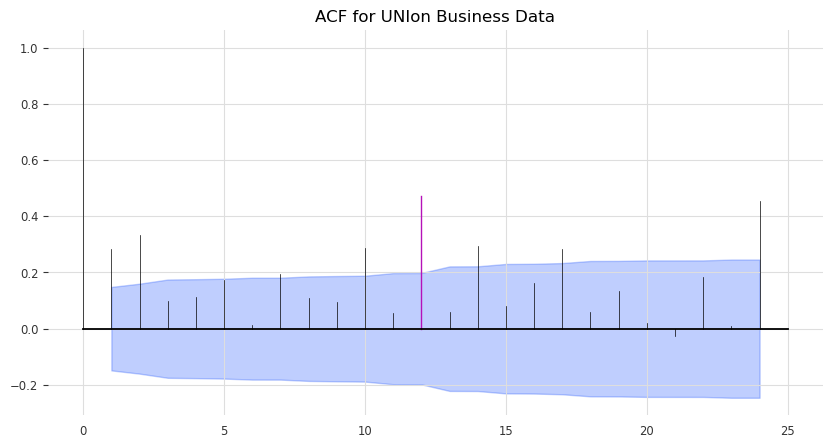

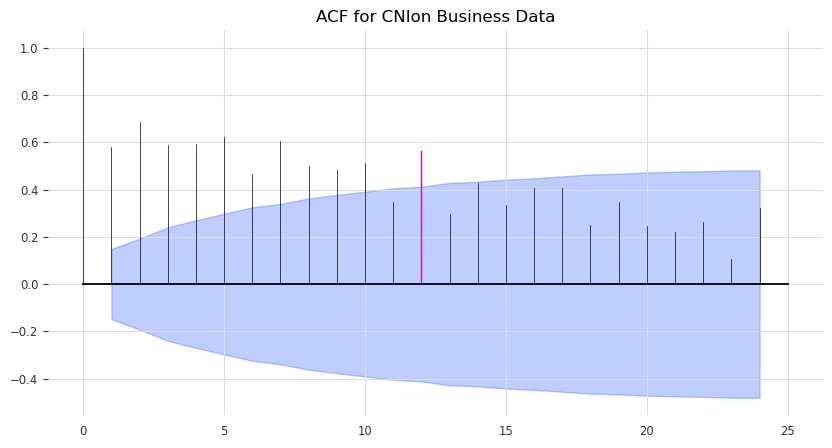

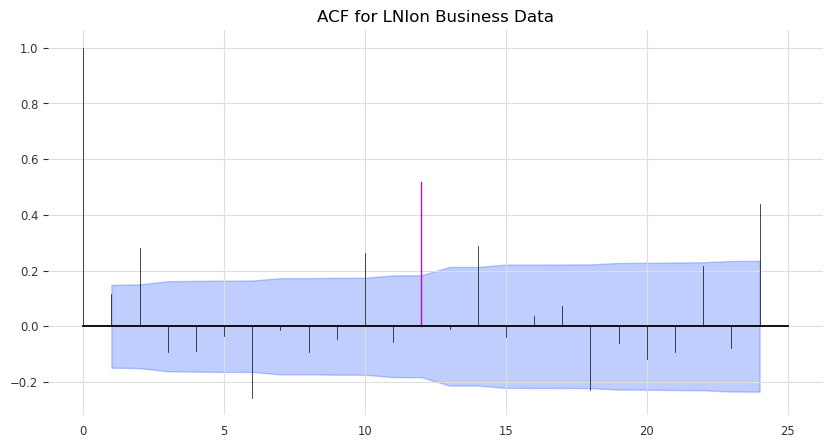

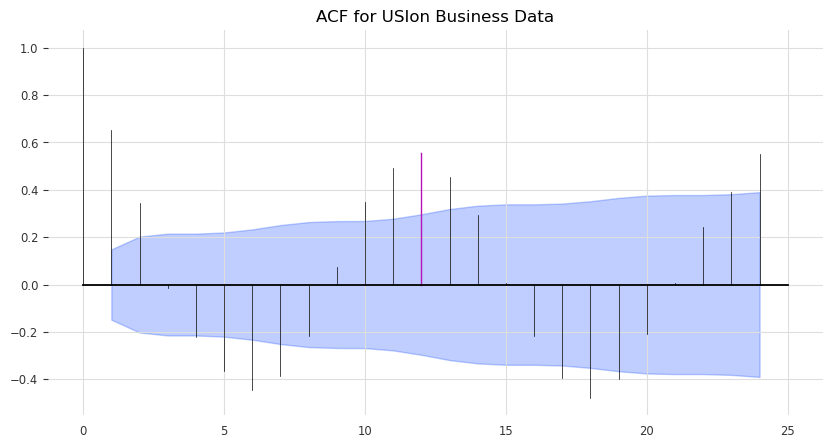

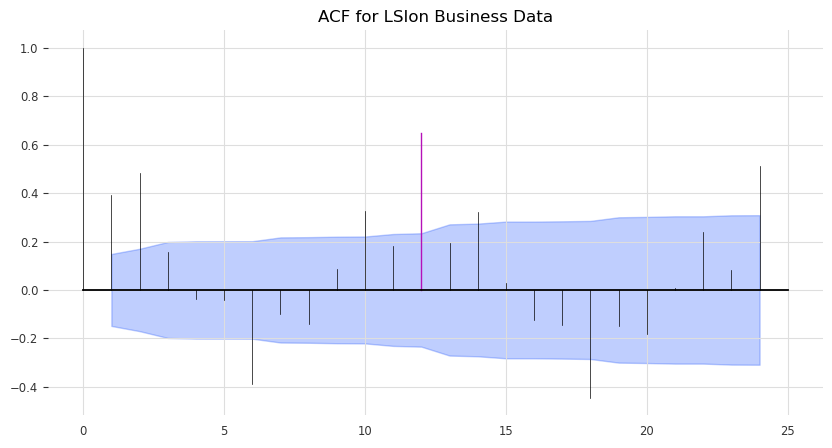

In [12]:
from darts.utils.statistics import plot_acf, check_seasonality
for i in range(len(timeseries_list)):
    plot_acf(timeseries_list[i]['Selected business demand (GWh)'], m=12, alpha=0.05, max_lag=24)
    plt.title('ACF for ' + zone_names[i] + 'on Business Data')

In [21]:
for i in range(len(timeseries_list)):
    print(file_list_name[i])
    naive_model = NaiveSeasonal(K=12)
    y_pred = naive_model.historical_forecasts(timeseries_list[i][['Selected business demand (GWh)']], start=pd.Timestamp('2018-01-01'), forecast_horizon=3)
    # residential_metrics.loc[len(residential_metrics.index)] = [rmse(val[Electricity_Type], ypred), 
    #                                                            mae(val[Electricity_Type], ypred), 
    #                                                            mape(val[Electricity_Type], ypred), 
    #                                                             zone_names[i]]
    # ypred.to_csv(f"./Predictions/SeasonalNB,{zone_names[i]},res.csv")
    business_metrics.loc[len(business_metrics.index)] = [rmse(timeseries_list[i][['Selected business demand (GWh)']], y_pred), 
                                                               mae(timeseries_list[i][['Selected business demand (GWh)']], y_pred), 
                                                               mape(timeseries_list[i][['Selected business demand (GWh)']], y_pred), 
                                                                zone_names[i]]
    backtest_pred = y_pred.pd_dataframe()
    backtest_pred.rename(columns={"Selected business demand (GWh)": "predictions"}, inplace=True)
    backtest_pred = backtest_pred.join(timeseries_list[i].pd_dataframe()['Selected business demand (GWh)'], how='inner')
    backtest_pred['difference'] = backtest_pred['predictions'] - backtest_pred['Selected business demand (GWh)']
    backtest_pred.to_csv(f'Naive_Seasonal,{zone_names[i]},bus.csv')

Electricity-ResBusClimateUNI.csv
Electricity-ResBusClimateCNI.csv
Electricity-ResBusClimateLNI.csv
Electricity-ResBusClimateUSI.csv
Electricity-ResBusClimateLSI.csv


Electricity-ResBusClimateUNI.csv
Electricity-ResBusClimateCNI.csv
Electricity-ResBusClimateLNI.csv
Electricity-ResBusClimateUSI.csv
Electricity-ResBusClimateLSI.csv


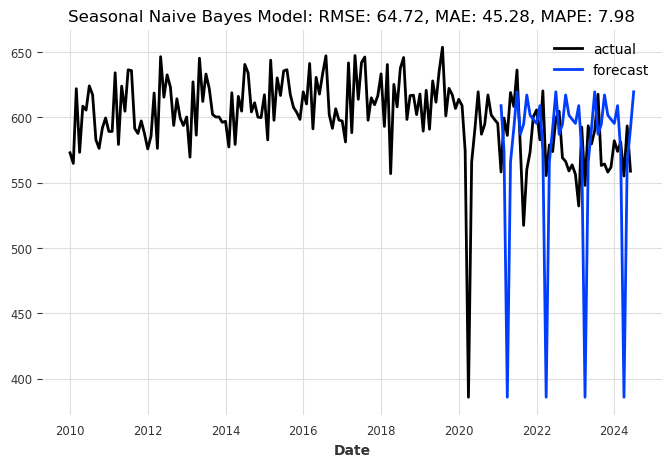

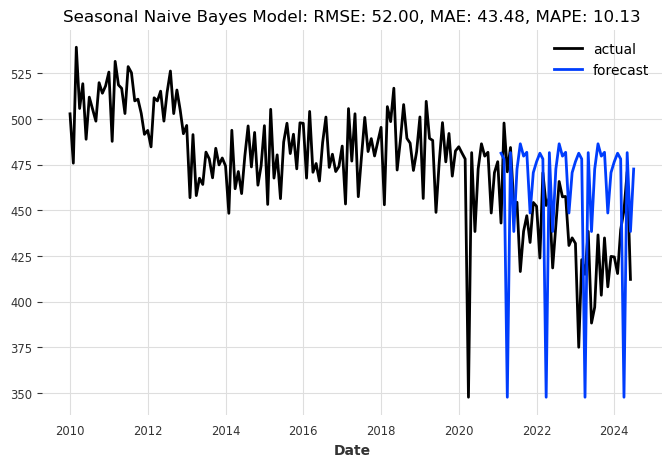

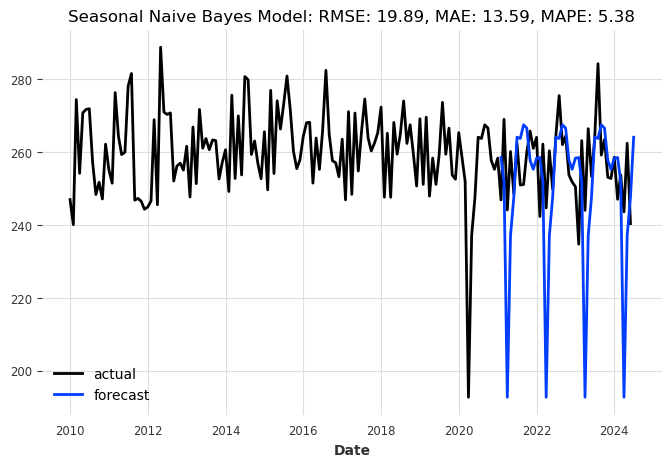

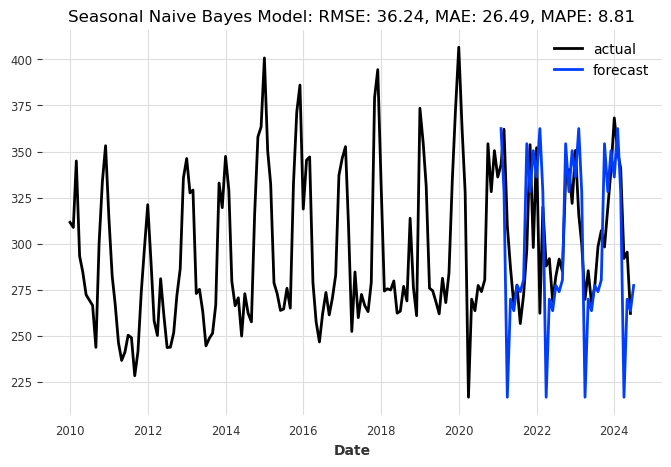

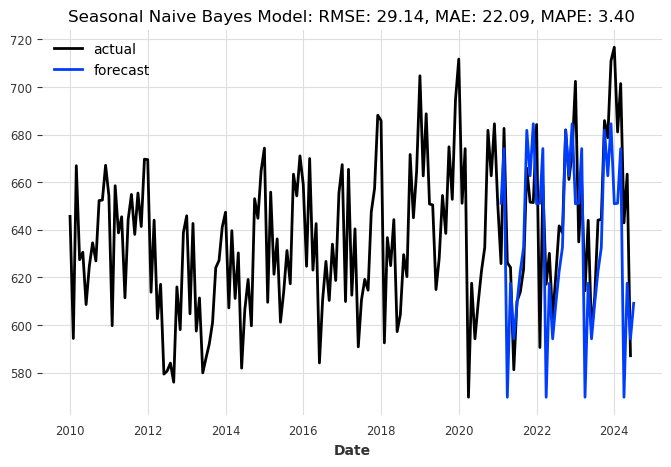

In [13]:
Electricity_Type = 'Selected business demand (GWh)'

for i in range(len(timeseries_list)):
    print(file_list_name[i])
    train, val = timeseries_list[i].split_after(pd.Timestamp('2021-01-01'))
    naive_model = NaiveSeasonal(K=12)
    naive_model.fit(train)
    ypred = eval_model(naive_model, timeseries_list[i], val[Electricity_Type], Electricity_Type)
    business_metrics.loc[len(business_metrics.index)] = [rmse(val[Electricity_Type], ypred), 
                                                               mae(val[Electricity_Type], ypred), 
                                                               mape(val[Electricity_Type], ypred), 
                                                                zone_names[i]]
    ypred.to_csv(f"./Predictions/SeasonalNB,{zone_names[i]},bus.csv")
    

In [22]:
business_metrics

,RMSE,MAE,MAPE,Zone
0,42.223203,24.346579,4.436338,UNI
1,32.210712,22.469618,5.181416,CNI
2,11.963206,7.433645,3.002598,LNI
3,39.054128,26.871842,8.778344,USI
4,25.345730,19.542237,3.029245,LSI


In [15]:
file_list_name = ['Electricity-ResBusClimateUNI.csv', 'Electricity-ResBusClimateCNI.csv', 
                  'Electricity-ResBusClimateLNI.csv', 'Electricity-ResBusClimateUSI.csv', 'Electricity-ResBusClimateLSI.csv']
path_name = '../AnalysisAndPreprocessing/ProcessedData_2020-04_Adjusted/'
timeseries_list = [get_timeseries(path_name + file) for file in file_list_name]


In [16]:
business_metrics_adjusted = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'Zone'])

Electricity-ResBusClimateUNI.csv
Electricity-ResBusClimateCNI.csv
Electricity-ResBusClimateLNI.csv
Electricity-ResBusClimateUSI.csv
Electricity-ResBusClimateLSI.csv


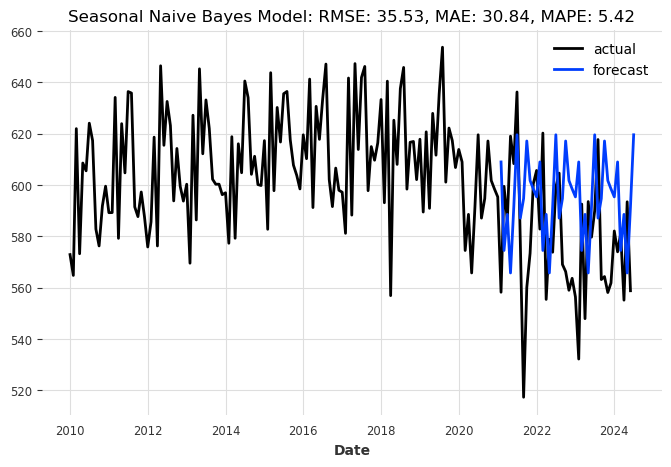

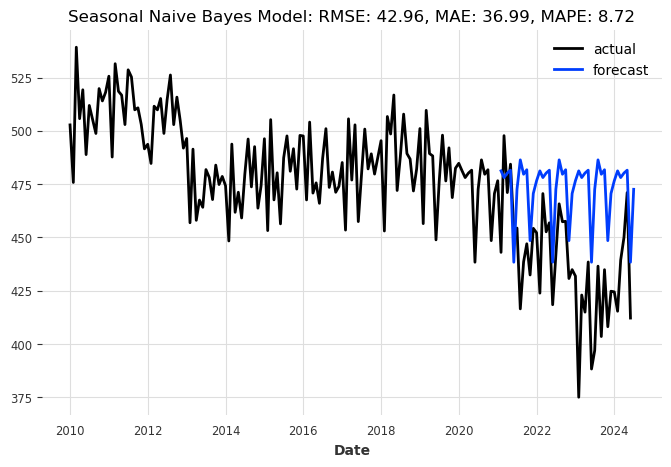

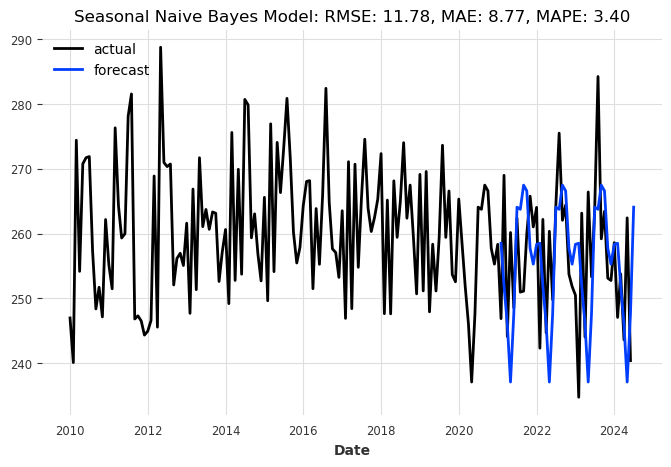

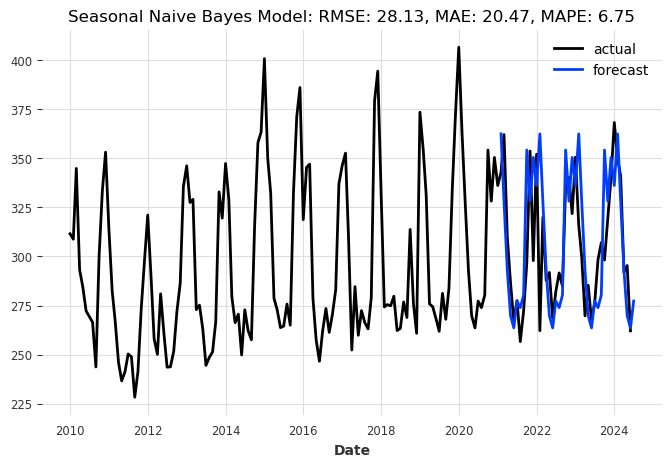

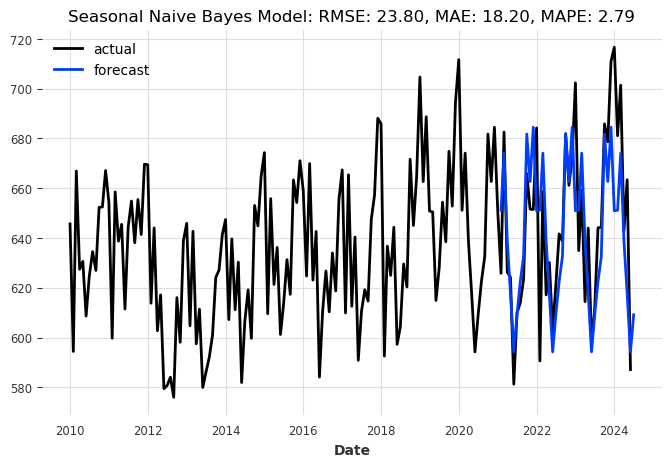

In [17]:
for i in range(len(timeseries_list)):
    print(file_list_name[i])
    train, val = timeseries_list[i].split_after(pd.Timestamp('2021-01-01'))
    naive_model = NaiveSeasonal(K=12)
    naive_model.fit(train)
    ypred = eval_model(naive_model, timeseries_list[i], val['Selected business demand (GWh)'], 'Selected business demand (GWh)')
    business_metrics_adjusted.loc[len(business_metrics_adjusted.index)] = [rmse(val['Selected business demand (GWh)'], ypred), 
                                                               mae(val['Selected business demand (GWh)'], ypred), 
                                                               mape(val['Selected business demand (GWh)'], ypred), 
                                                                zone_names[i]]
    ypred.to_csv(f"./Predictions/outlieradj/SeasonalNB,{zone_names[i]},bus.csv")


In [18]:
business_metrics_adjusted

,RMSE,MAE,MAPE,Zone
0,35.532342,30.843805,5.416914,UNI
1,42.958476,36.992561,8.719316,CNI
2,11.782911,8.765024,3.404391,LNI
3,28.126676,20.470634,6.750590,USI
4,23.803245,18.195390,2.785042,LSI
